In [1]:
import numpy as np
import pandas as pd

In [2]:
import random as rd

In [3]:
from ml_from_scratch.neighbors import NearestNeighbors

In [4]:
kolom_1 = [rd.random()*10 + 5 for i in range(100)]

In [5]:
kolom_1

[8.663741304498318,
 9.742814988648888,
 13.743421586561649,
 8.660811760550875,
 7.383616508702925,
 9.60589854272647,
 9.162165210347933,
 5.808607561891347,
 10.523524148139854,
 8.530172318951141,
 9.4201851737512,
 14.106078257648432,
 12.921580408508303,
 12.1491662080555,
 7.565823859294108,
 8.026387303907683,
 10.099453970839324,
 5.6989723149201,
 9.879309217260865,
 8.00732646233248,
 5.875368302663278,
 12.436225196328946,
 8.37777086904042,
 9.673324402876812,
 5.941807322148928,
 13.56842764021703,
 12.950046623348996,
 5.053757752948744,
 7.475128897460723,
 12.160451231094456,
 7.126814408087602,
 5.542929156250481,
 12.063096625085738,
 9.155197550097439,
 9.862537758362985,
 10.085916876544921,
 14.958236850792781,
 9.566701419015907,
 7.810879297573989,
 12.962261061939948,
 10.745177434672932,
 6.436641358820335,
 13.763685316714922,
 14.501997138909587,
 14.871763625521407,
 10.938871217803172,
 9.870957104482043,
 7.462492354661743,
 7.719635328412409,
 11.3843624

In [6]:
kolom_2 = [rd.random()*10 + 5 for i in range(100)]
kolom_2

[13.988613302911064,
 12.202645013944853,
 14.950265799394076,
 10.038715690522437,
 12.844665105583685,
 13.880819623359544,
 12.056690737105448,
 10.340081133551415,
 12.687877748425452,
 6.158203095246453,
 13.509916007242506,
 9.187885535878227,
 13.249315127710723,
 6.902097939872224,
 13.8385256634732,
 7.83770634939433,
 11.303417807837235,
 14.914005203749925,
 13.4475849569464,
 8.328152780772928,
 8.838054037693365,
 13.901528856167959,
 14.276297210489151,
 5.624841519019553,
 13.89758284213276,
 10.800187787493442,
 8.359346053980332,
 6.802213492817836,
 12.716905935848423,
 5.09126266126104,
 9.692063928516664,
 10.88738545648047,
 7.690411067004536,
 10.867381064505421,
 13.353691582539561,
 12.322286139078962,
 6.50021004795891,
 5.760374400816084,
 8.558397761628866,
 5.832884878294557,
 12.150838393486984,
 5.560378692837124,
 5.878946391124752,
 12.16696484067416,
 14.494978983310702,
 12.389117629329105,
 6.633402552349985,
 13.466095347763904,
 8.786904213458389,
 

In [7]:
target = [rd.randint(0, 1) for i in range(100)]

In [8]:
dummy = {
    'kolom_1': kolom_1,
    'kolom_2': kolom_2,
    'target': target
}

In [9]:
data = pd.DataFrame(dummy)

In [10]:
test_many = [rd.random()*10+5 for i in range(20)]

In [11]:
test = {
    'kolom_1': [rd.random()*10 + 5],
    'kolom_2': [rd.random()*10 + 5]
}

In [12]:
data_test = pd.DataFrame(test)
data_test

,kolom_1,kolom_2
0,7.159702,9.336178


In [13]:
import matplotlib.pyplot as plt

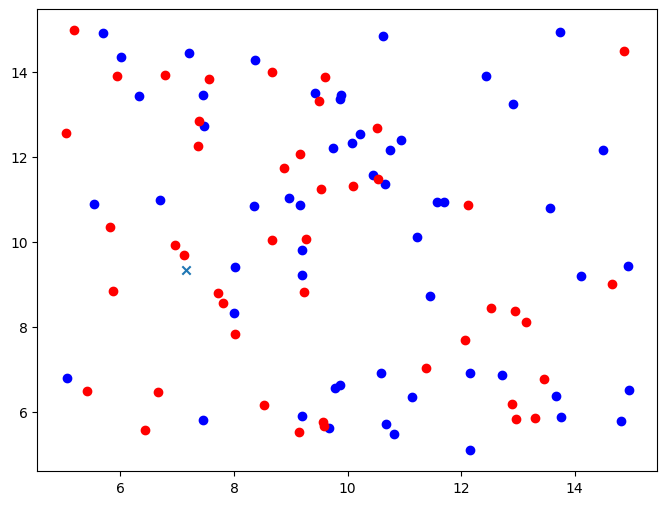

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(data['kolom_1'][data['target'] == 1], data['kolom_2'][data['target'] == 1], c='b')
ax.scatter(data['kolom_1'][data['target'] == 0], data['kolom_2'][data['target'] == 0], c='r')
ax.scatter(data_test['kolom_1'], data_test['kolom_2'], marker='x')
plt.show()

In [15]:
train_arr = np.array(data[['kolom_1', 'kolom_2']])
test_arr = np.array(data_test)

In [16]:
train_arr

array([[ 8.6637413 , 13.9886133 ],
       [ 9.74281499, 12.20264501],
       [13.74342159, 14.9502658 ],
       [ 8.66081176, 10.03871569],
       [ 7.38361651, 12.84466511],
       [ 9.60589854, 13.88081962],
       [ 9.16216521, 12.05669074],
       [ 5.80860756, 10.34008113],
       [10.52352415, 12.68787775],
       [ 8.53017232,  6.1582031 ],
       [ 9.42018517, 13.50991601],
       [14.10607826,  9.18788554],
       [12.92158041, 13.24931513],
       [12.14916621,  6.90209794],
       [ 7.56582386, 13.83852566],
       [ 8.0263873 ,  7.83770635],
       [10.09945397, 11.30341781],
       [ 5.69897231, 14.9140052 ],
       [ 9.87930922, 13.44758496],
       [ 8.00732646,  8.32815278],
       [ 5.8753683 ,  8.83805404],
       [12.4362252 , 13.90152886],
       [ 8.37777087, 14.27629721],
       [ 9.6733244 ,  5.62484152],
       [ 5.94180732, 13.89758284],
       [13.56842764, 10.80018779],
       [12.95004662,  8.35934605],
       [ 5.05375775,  6.80221349],
       [ 7.4751289 ,

In [17]:
test_arr

array([[7.15970241, 9.33617815]])

In [18]:
delta_sq = (train_arr - test_arr)**2

In [19]:
delta_sq

array([[2.26213299e+00, 2.16451528e+01],
       [6.67247059e+00, 8.21663228e+00],
       [4.33453582e+01, 3.15179801e+01],
       [2.25332928e+00, 4.93558995e-01],
       [5.01375229e-02, 1.23094807e+01],
       [5.98387551e+00, 2.06537661e+01],
       [4.00985726e+00, 7.40118873e+00],
       [1.82545729e+00, 1.00782120e+00],
       [1.13152967e+01, 1.12338902e+01],
       [1.87818777e+00, 1.00995255e+01],
       [5.10978232e+00, 1.74200877e+01],
       [4.82521374e+01, 2.19906996e-02],
       [3.31992381e+01, 1.53126410e+01],
       [2.48947490e+01, 5.92474647e+00],
       [1.64934630e-01, 2.02711331e+01],
       [7.51142703e-01, 2.24541774e+00],
       [8.64213923e+00, 3.87003187e+00],
       [2.13373242e+00, 3.11121546e+01],
       [7.39626118e+00, 1.69036659e+01],
       [7.18466531e-01, 1.01611515e+00],
       [1.64951410e+00, 2.48127632e-01],
       [2.78416927e+01, 2.08424271e+01],
       [1.48369077e+00, 2.44047763e+01],
       [6.31829552e+00, 1.37740196e+01],
       [1.483268

In [20]:
delta_sq.shape[1]

2

In [21]:
(delta_sq[:, 0] + delta_sq[:, 1])**0.5

array([4.88950773, 3.85864003, 8.65236027, 1.65737391, 3.51562487,
       5.16116669, 3.37802398, 1.68323453, 4.74859841, 3.4608833 ,
       4.74656402, 6.94795856, 6.96504695, 5.55153091, 4.52062692,
       1.73105761, 3.53725474, 5.76592465, 4.92949562, 1.31703518,
       1.37754918, 6.97740065, 5.08807106, 4.48244522, 4.72119489,
       6.57381801, 5.87216204, 3.29484139, 3.39541076, 6.5594814 ,
       0.35740217, 2.24058025, 5.17221656, 2.51527001, 4.84207942,
       4.18085781, 8.29818381, 4.31045435, 1.01438339, 6.77810819,
       4.55828295, 3.84440878, 7.45419624, 7.8690943 , 9.27842197,
       4.85824622, 3.82830223, 4.14100203, 0.7843639 , 4.80927876,
       4.81723091, 4.30196072, 4.6108697 , 5.97726397, 4.17457426,
       2.92512169, 7.49664146, 3.81765047, 1.71050278, 3.87169049,
       0.86447417, 3.34271435, 4.33505892, 5.05579282, 8.44195815,
       4.40692886, 6.50819123, 6.11301507, 6.80349839, 4.0443957 ,
       3.97802101, 5.45005772, 2.9533629 , 4.97426716, 4.13946

In [22]:
np.sum(delta_sq, axis=1) == delta_sq[:, 0] + delta_sq[:, 1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [23]:
test_arr.shape

(1, 2)

In [24]:
def calc_dist(X_target:np.ndarray, X_train:np.ndarray) -> np.ndarray:
    delta_squared = (X_train - X_target)**2
    row_sum = np.sum(delta_squared, axis=1)
    return row_sum**0.5

In [25]:
dist = calc_dist(test_arr, train_arr)

In [26]:
list(data['target'][list(dist.argsort())[:3]].value_counts(normalize=True))

[1.0]

In [27]:
dist[19]

1.3170351847124055

In [28]:
test_arr.shape

(1, 2)

In [29]:
delta_sq

array([[2.26213299e+00, 2.16451528e+01],
       [6.67247059e+00, 8.21663228e+00],
       [4.33453582e+01, 3.15179801e+01],
       [2.25332928e+00, 4.93558995e-01],
       [5.01375229e-02, 1.23094807e+01],
       [5.98387551e+00, 2.06537661e+01],
       [4.00985726e+00, 7.40118873e+00],
       [1.82545729e+00, 1.00782120e+00],
       [1.13152967e+01, 1.12338902e+01],
       [1.87818777e+00, 1.00995255e+01],
       [5.10978232e+00, 1.74200877e+01],
       [4.82521374e+01, 2.19906996e-02],
       [3.31992381e+01, 1.53126410e+01],
       [2.48947490e+01, 5.92474647e+00],
       [1.64934630e-01, 2.02711331e+01],
       [7.51142703e-01, 2.24541774e+00],
       [8.64213923e+00, 3.87003187e+00],
       [2.13373242e+00, 3.11121546e+01],
       [7.39626118e+00, 1.69036659e+01],
       [7.18466531e-01, 1.01611515e+00],
       [1.64951410e+00, 2.48127632e-01],
       [2.78416927e+01, 2.08424271e+01],
       [1.48369077e+00, 2.44047763e+01],
       [6.31829552e+00, 1.37740196e+01],
       [1.483268

In [30]:
choiche = [rd.choice([1, 0]) for i in range(100)]
choiche

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1]

In [31]:
df = pd.DataFrame(np.array(choiche), columns=['choice'])

In [32]:
dfi = pd.DataFrame(df.value_counts(normalize=True)).reset_index()
dfarr = np.array(dfi).T

In [33]:
dfarr[:, 0]

array([0.  , 0.56])

In [34]:
(delta_sq - np.mean(delta_sq, axis=0))/np.std(delta_sq, axis=0)

array([[-0.70871394,  1.47329649],
       [-0.4457729 , -0.15199444],
       [ 1.74063735,  2.66823204],
       [-0.70923881, -1.08673933],
       [-0.84059146,  0.3433743 ],
       [-0.48682642,  1.35330621],
       [-0.60451592, -0.25068983],
       [-0.73474822, -1.02449676],
       [-0.16897106,  0.21319261],
       [-0.73160447,  0.07589732],
       [-0.53893921,  0.96192518],
       [ 2.03317587, -1.14381455],
       [ 1.13573322,  0.70685509],
       [ 0.64062577, -0.42938771],
       [-0.83374735,  1.30699508],
       [-0.79879806, -0.87470703],
       [-0.32834272, -0.6780755 ],
       [-0.71636909,  2.61911386],
       [-0.40262104,  0.89942123],
       [-0.80074619, -1.02349292],
       [-0.74523782, -1.11644457],
       [ 0.81632036,  1.37614037],
       [-0.75512409,  1.80730134],
       [-0.46688855,  0.52063149],
       [-0.75514927,  1.37178146],
       [ 1.60508706, -0.88706369],
       [ 1.1553389 , -1.03098657],
       [-0.57916906, -0.36932758],
       [-0.83764888,

In [35]:
from neighbors._base import NearestNeighbors
from neighbors.classifier import KNNClassifier

ModuleNotFoundError: No module named 'neighbors'

In [ ]:
knn = KNNClassifier()

In [ ]:
def func(x):
    if not x:
        return
    print("true")

In [ ]:
x = func(False)

In [ ]:
knn.fit(delta_sq, choiche)

In [ ]:
knn._output_data

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
test = np.array([[ 1.51676512, -2.47909951],
       [ 4.92804763, -2.95066551],
       [ 2.25077705,  0.92468329],
       [ 1.25077705,  0.92468329]
       ])

In [ ]:
test[0].shape

(2,)

In [ ]:
knn.predict(test)

[1.]
[1. 1.]
[1. 1. 0.]
[1. 1. 0. 0.]


array([1., 1., 0., 0.])

In [ ]:
for cls in np.unique(knn._output_data):
    print(cls)

0
1


In [ ]:
out = knn._predict_proba(test, axis=0)

TypeError: KNNClassifier._predict_proba() got an unexpected keyword argument 'axis'

In [ ]:
out

array([[0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [ ]:
np.argmax(out[1, :])

0

In [ ]:
out[0, np.argmax(out[1, :])]

0.0

In [ ]:
x = np.array([])
np.append(x, [1])

array([1.])

In [ ]:
pd.DataFrame(out).value_counts(normalize=True).get('yes', 0)

: 

In [ ]:
x=np.array(choiche)

: 

: 

In [ ]:
set(x.tolist())

: 

In [ ]:
outt = np.zeros(shape=(2, 3))

: 

In [ ]:
outt[0, 0] = 5

: 

In [ ]:
outt[0, :]

: 

In [ ]:
import hashlib

: 

: 

In [ ]:
hashlib.sha256("hello world".encode()).hexdigest()

: 

In [ ]:
hashlib.sha256("hello world-rahmanazizf".encode()).hexdigest()

: 

In [ ]:
rd.choices(asc)

: 

In [ ]:
import string

: 

In [ ]:
string.ascii_letters

: 

In [ ]:
string.digits

: 

In [ ]:
"".join(rd.choices(string.ascii_letters+string.digits, k=5))

: 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
LabelEncoder()

LabelEncoder()

In [4]:
data = pd.read_csv("Iris.csv").drop('Id', axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from ml_from_scratch.neighbors import KNNClassifier

In [6]:
clf = KNNClassifier(k=5)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = data.loc[:, ['Species']]
X = data.iloc[:, :-1]

In [9]:
np.array(y).reshape(len(y),).shape

(150,)

In [10]:
le = LabelEncoder()
y_enc = le.fit_transform(np.array(y).reshape(len(y),))
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

In [12]:
clf.fit(X_train, y_train)

In [13]:
len(np.unique(y_test))

3

In [14]:
y_pred = clf.predict(X_test)

[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
neighbor_proba [[ 0.  1.  2.]
 [nan nan  1.]]
[[0. 0

In [15]:
y_ori = le.inverse_transform(y_pred.astype(int))

In [16]:
y_ori

array([], dtype=float64)

In [17]:
y_act = le.inverse_transform(np.array(y_test))
y_act

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)